<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

**1. Загрузить датасет**

In [125]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.metrics import classification_report

%matplotlib inline

In [126]:
import io
import requests
url="creditcard.csv"
dataset_temp=pd.read_csv(url) 
dataset_temp.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [127]:
dataset_temp.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

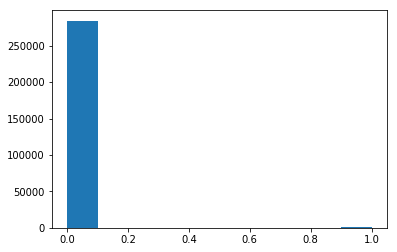

In [128]:
plt.hist(dataset_temp['Class'], histtype='bar')
plt.show()

In [129]:
fake_transactions = dataset_temp[dataset_temp['Class']==1]['Amount']
true_transactions = dataset_temp[dataset_temp['Class']==0]['Amount']

/Users/svetlana/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


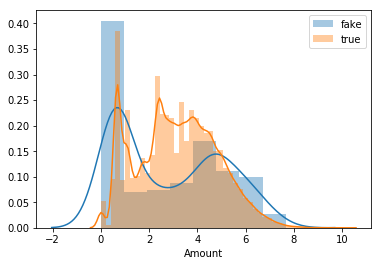

In [130]:
sns.distplot(np.log(fake_transactions+1))
sns.distplot(np.log(true_transactions+1))
plt.legend(['fake', 'true'])
plt.show()

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [131]:
print('Обманные операции: ' , fake_transactions.sum())
print('Нормальные операции: ' , true_transactions.sum())

Обманные операции:  60127.97
Нормальные операции:  25102462.04


**5. Построить графики histograms для всех значений**

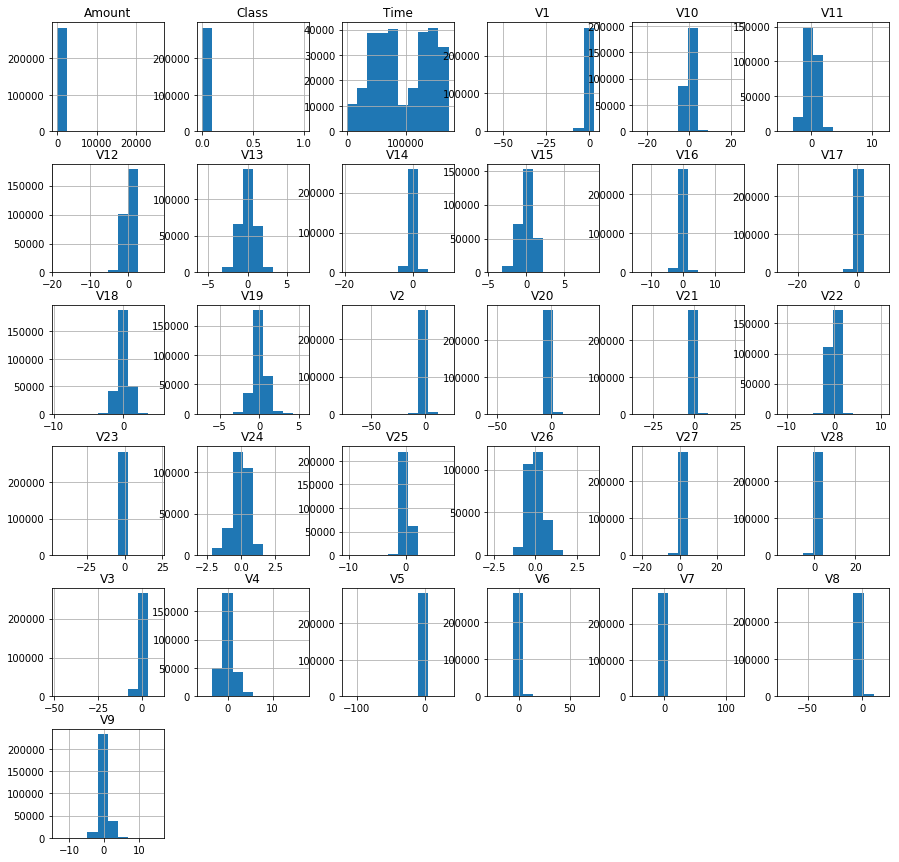

In [132]:
dataset_temp.hist(figsize=(15,15))
plt.show()

**6. Построить матрицу корреляций для всех значений**

In [133]:
headers = list(dataset_temp.columns.values)

In [134]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(dataset_temp)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,-1.0
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,-1.0
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,-1.0
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,-1.0
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,-1.0


In [135]:
df_norm.columns = headers
df_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,-1.0
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,-1.0
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,-1.0
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,-1.0
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,-1.0


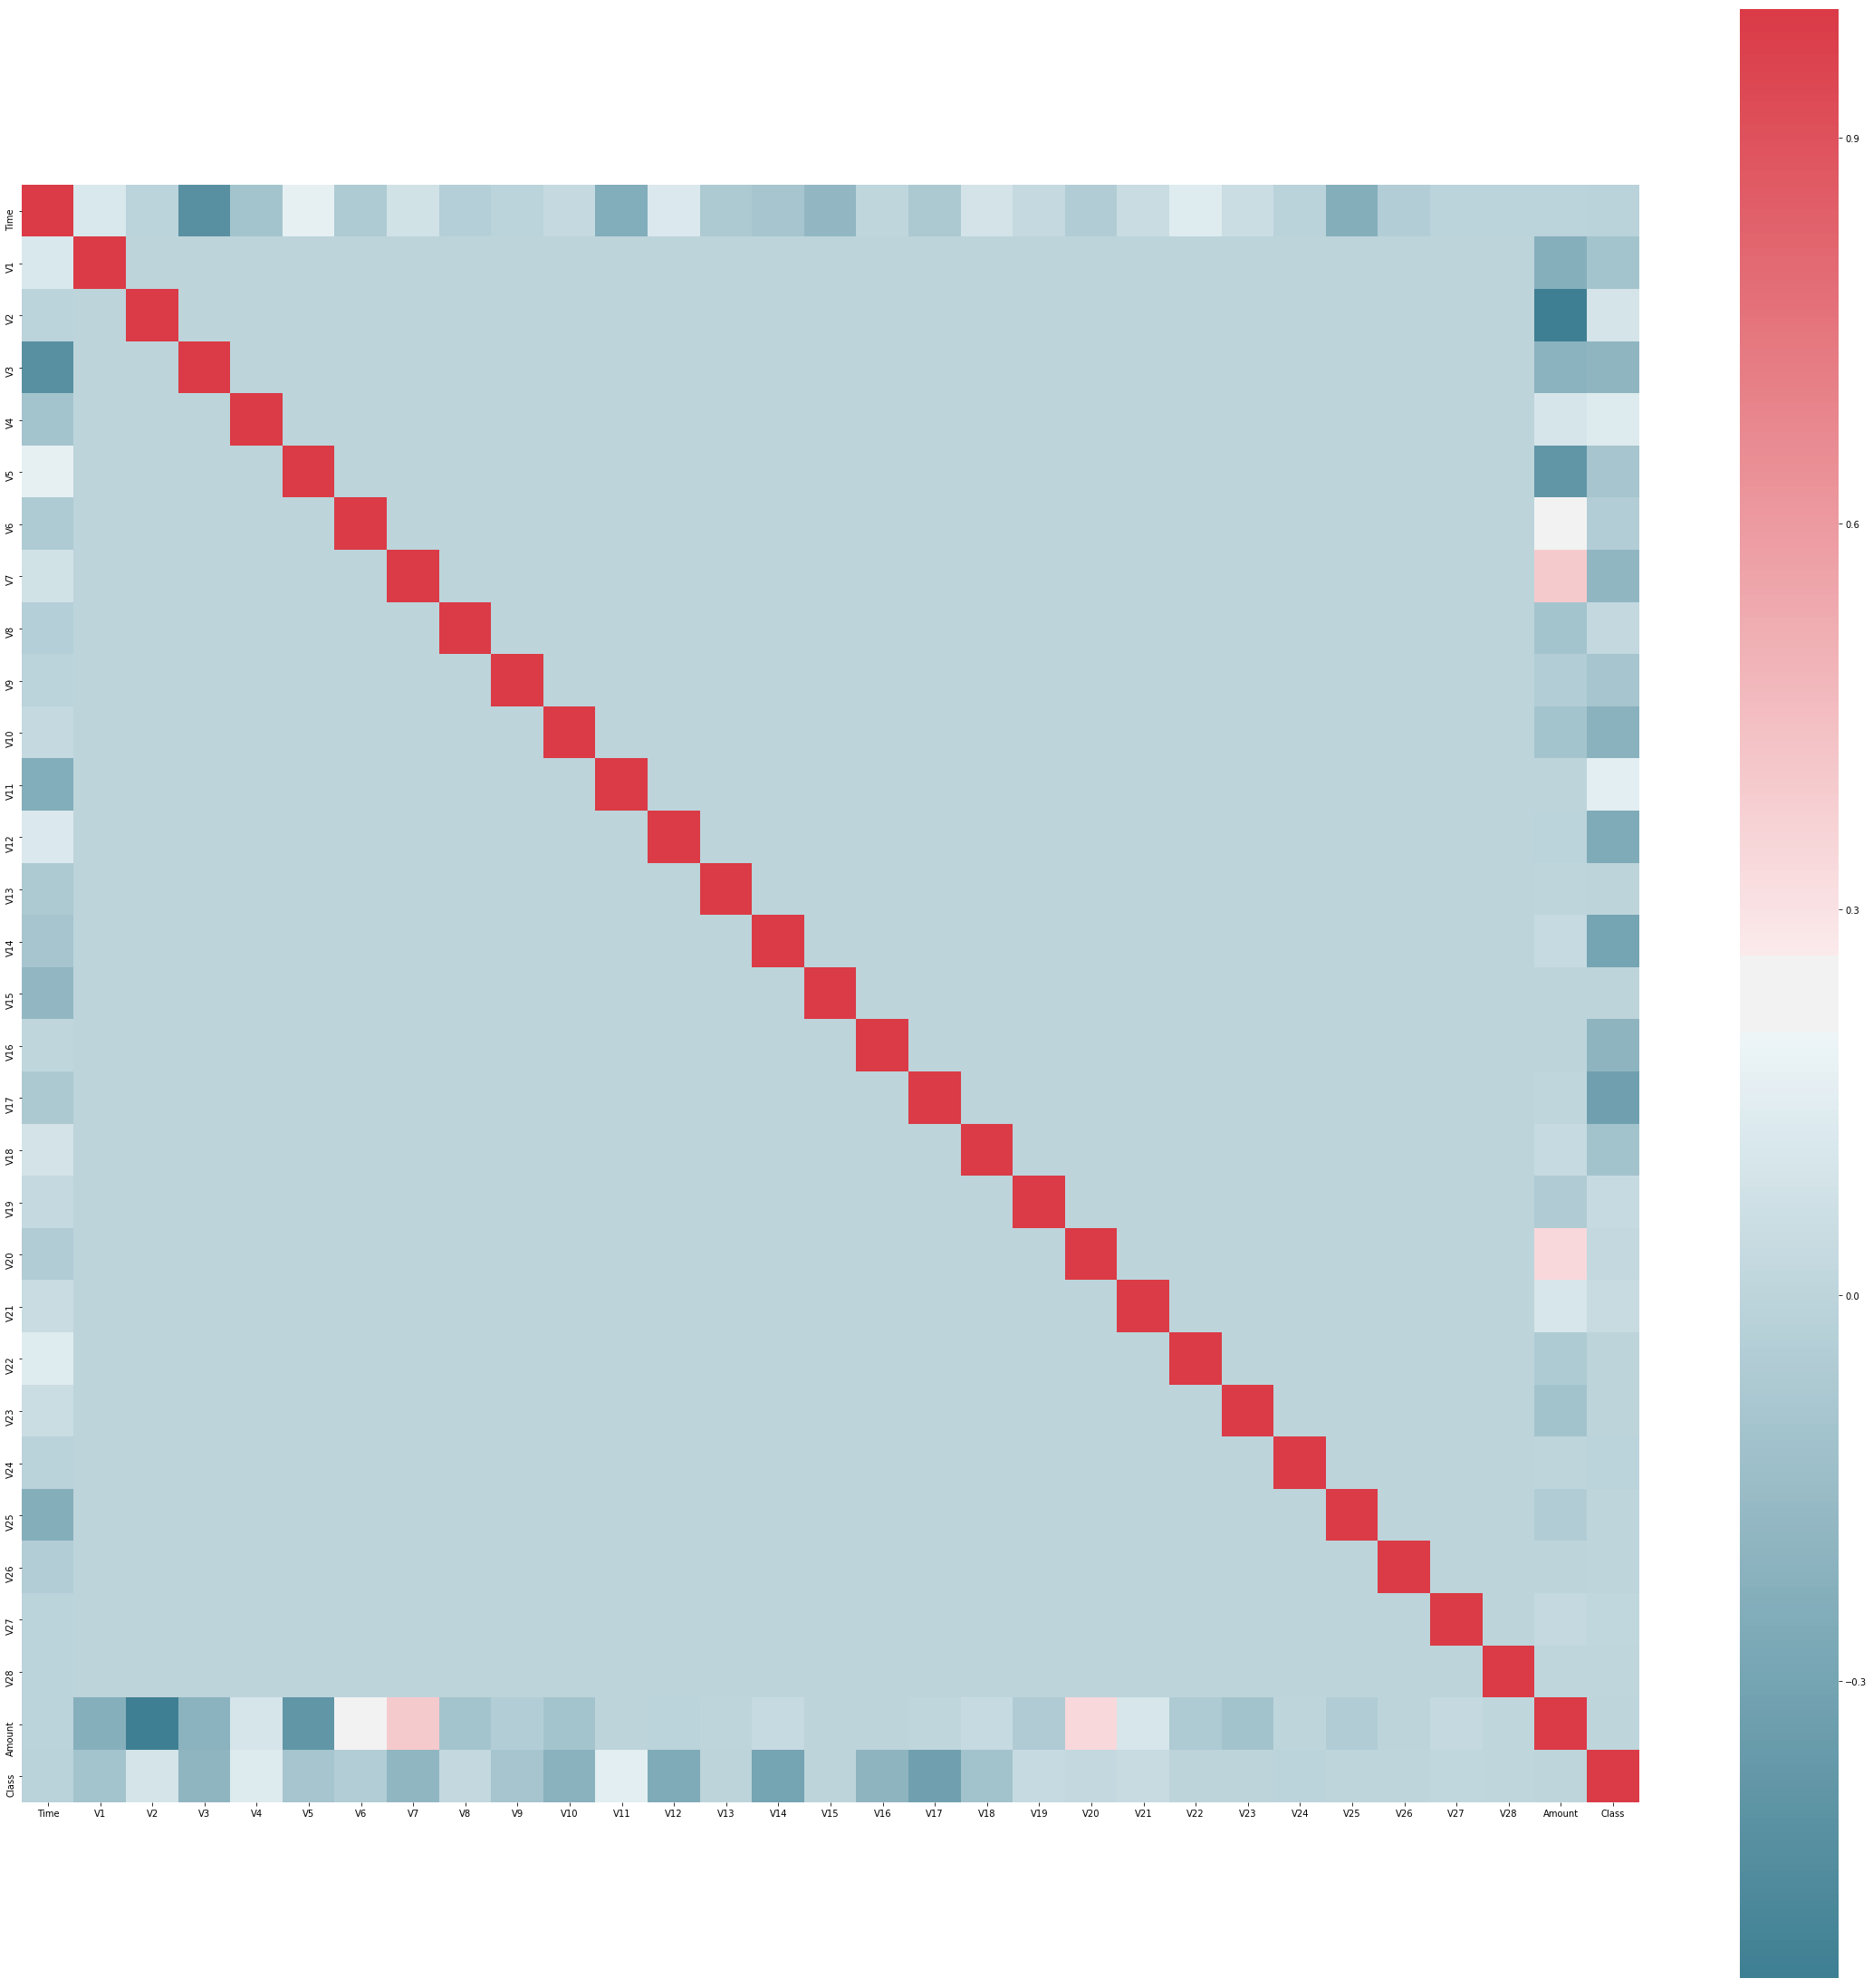

In [136]:
f, ax = plt.subplots(figsize=(40, 40))
corr = df_norm.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать логистическую регрессию. Сделать classification report. Нормализовать значения. Написать логистическую регрессию. Сделать classification report, сравнить с предыдущим report. Есть ли улучшения?**

In [137]:
from sklearn.model_selection import train_test_split
df = dataset_temp.drop('Class', axis=1)
Y = dataset_temp['Class']
X_train,X_test,y_train,y_test = train_test_split(df,
                                                 Y,
                                                 test_size = 0.3,
                                                 random_state = 3)

In [138]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg').fit(X_train, y_train)

/Users/svetlana/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [139]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85291
          1       0.90      0.62      0.73       152

avg / total       1.00      1.00      1.00     85443



In [140]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(dataset_temp)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,-1.0
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,-1.0
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,-1.0
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,-1.0
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,-1.0


In [141]:
headers = list(dataset_temp.columns.values)
df_norm.columns = headers
df_ = df_norm.drop('Class', axis=1)
Y = dataset_temp['Class']
X_train, X_test,y_train,y_test = train_test_split(df,
                                                 Y,
                                                 test_size = 0.3,
                                                 random_state = 3)


In [142]:
model_norm = LogisticRegression(solver='newton-cg').fit(X_train, y_train)

/Users/svetlana/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [143]:
model_pred = model_norm.predict(X_test)
print(classification_report(y_test, model_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85291
          1       0.90      0.62      0.73       152

avg / total       1.00      1.00      1.00     85443



In [144]:
df_original = dataset_temp.drop('Class', axis=1)
Y = dataset_temp['Class']
X_train,X_test,y_train,y_test = train_test_split(df_original,
                                                 Y,
                                                 test_size = 0.3,
                                                 random_state = 3)

In [145]:
model_original = LogisticRegression(solver='newton-cg').fit(X_train, y_train)

/Users/svetlana/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [146]:
model_pred = model_original.predict(X_test)
print(classification_report(y_test, model_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85291
          1       0.90      0.62      0.73       152

avg / total       1.00      1.00      1.00     85443



In [147]:
output_y = dataset_temp.iloc[:,30:]
input_x = df_norm.iloc[:,:30]

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.3)

**8. Написать модель RandomForestClassifier на данный датасет и сравнить результаты с логистической регрессией. Почему результаты получились лучше (или хуже). Тренировочные и тестовые данные выбираем одинаковые (те же, что и для логистической регрессии), полученные на шаге 7.**

In [149]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(criterion='gini',
                             n_estimators=2,
                             random_state=1,
                             n_jobs=2)
model.fit(X_train,y_train)

/Users/svetlana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [150]:
print(model.feature_importances_)

[0.00262918 0.02385275 0.04420147 0.00394536 0.01468899 0.00106527
 0.01716345 0.01285105 0.02439637 0.01418155 0.07131579 0.03640442
 0.02682896 0.01082237 0.22955334 0.01694829 0.02752702 0.32135624
 0.01074792 0.01522343 0.00774676 0.00837627 0.00245179 0.00622863
 0.01096047 0.01308148 0.01234227 0.00665658 0.00294222 0.00351032]


/Users/svetlana/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


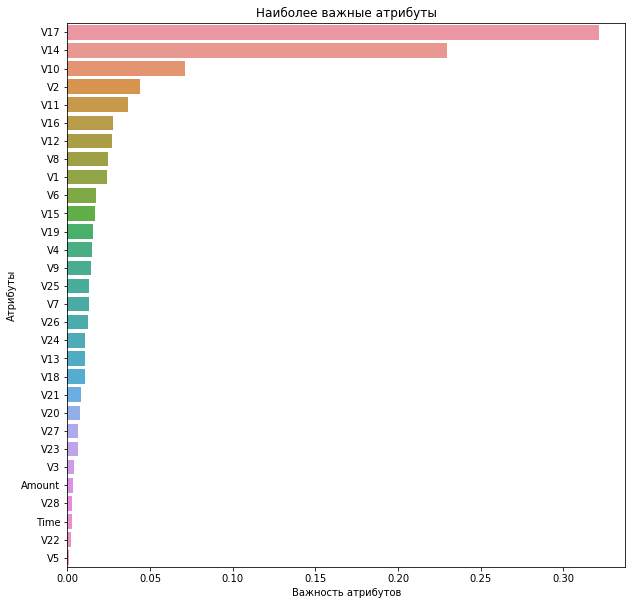

In [152]:
feature_imp = pd.Series(model.feature_importances_,index=headers[:30]).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [153]:
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

model.score(X_test, y_test)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85308
          1       0.94      0.64      0.76       135

avg / total       1.00      1.00      1.00     85443



0.9993679997191109

In [158]:
dataset_temp['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [159]:
from sklearn.utils import resample
#imblearn не устанавливался, поэтому я использовала другой метод upsampling, который нашла здесь 
# https://elitedatascience.com/imbalanced-classes

In [162]:
df_majority = dataset_temp[dataset_temp['Class']==0]
df_minority = dataset_temp[dataset_temp['Class']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=284315,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['Class'].value_counts()


1    284315
0    284315
Name: Class, dtype: int64

In [164]:
df = df_upsampled.drop('Class', axis=1)
Y = df_upsampled['Class']
X_train,X_test,y_train,y_test = train_test_split(df,
                                                 Y,
                                                 test_size = 0.3,
                                                 random_state = 3)

In [165]:
model = LogisticRegression(solver='newton-cg').fit(X_train, y_train)

/Users/svetlana/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [166]:
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

             precision    recall  f1-score   support

          0       0.93      0.98      0.95     85171
          1       0.98      0.92      0.95     85418

avg / total       0.95      0.95      0.95    170589



**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные). Написать логистическую регрессию на сгенерированные данные и сравнить результат с моделями, полученными на шаге 7 и 8. В качестве тестовых данных используем один и тот же датасет, полученный на шаге 7.**

# Задание для интересующихся time-series (временными рядами)

Есть датасет потребления электроэнергии.

In [ ]:
import pandas as pd
url="http://yustiks.ru/dataset/household_power_consumption.txt"

In [4]:
df = pd.read_csv(url, sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [5]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
# Хороший пример для LSTM модели можно найти здес